In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
floats_df = pd.read_csv('/Users/elijahflomen/Desktop/Capstone/data/profileData.csv')



sat_df = pd.read_csv('/Users/elijahflomen/Desktop/Capstone/data/satData.csv')
josie_df = pd.read_csv('/Users/elijahflomen/Desktop/Capstone/data/floatLocData.csv')

merged_df = sat_df.merge(floats_df, on=['float', "cycleNumber", "date"], how='inner')

In [32]:
# for each float, get min lat, max lat, min long max long -- this will give us a rough idea of the range of motion each float has
max_lat_long = merged_df.groupby(by='float').max().reset_index()[["float", "latitude", "longitude"]].rename(columns={'latitude': 'max_lat', 'longitude': 'max_long'})
min_lat_long = merged_df.groupby(by='float').min().reset_index()[["float", "latitude", "longitude"]].rename(columns={'latitude': 'min_lat', 'longitude': 'min_long'})
float_distances = max_lat_long.merge(min_lat_long, on='float', how='inner')
float_distances

,float,max_lat,max_long,min_lat,min_long
0,1902303,49.236000,-14.494000,41.515000,-18.788000
1,1902304,49.137000,-14.260000,46.579000,-17.493000
2,1902380,18.624000,-36.940000,17.318000,-38.048000
3,1902381,17.346000,-32.990000,15.186000,-34.353000
4,1902382,18.213000,-28.684000,16.645000,-30.500000
...,...,...,...,...,...
564,7900583,-38.797190,165.206910,-39.667270,164.902770
565,7900585,51.468780,-34.579940,49.306480,-39.905310
566,7900588,51.945904,-30.255620,49.401650,-39.023710
567,7900589,57.180080,-45.479260,53.349830,-50.259880


In [29]:
float_distances["lat_dist_km"] = np.abs(float_distances["max_lat"] - float_distances["min_lat"])*110.574
float_distances["long_dist_km"] = np.abs(float_distances["max_long"] - float_distances["min_long"])*110.574
float_distances = float_distances.drop(columns=["max_lat", "max_long", "min_lat", "min_long"])
float_distances["total_dist"] = float_distances["lat_dist_km"] + float_distances["long_dist_km"]
float_distances

,float,lat_dist_km,long_dist_km,total_dist
0,1902303,853.741854,474.804756,1328.546610
1,1902304,282.848292,357.485742,640.334034
2,1902380,144.409644,122.515992,266.925636
3,1902381,238.839840,150.712362,389.552202
4,1902382,173.380032,200.802384,374.182416
...,...,...,...,...
564,7900583,96.208226,33.629976,129.838202
565,7900585,239.094160,588.847462,827.941623
566,7900588,281.328342,969.522784,1250.851125
567,7900589,423.526063,528.612276,952.138339


In [31]:
print("The average float travels ", float_distances['total_dist'].mean())

The average float travels  4235.5599857007355


<AxesSubplot:xlabel='total_dist', ylabel='Count'>

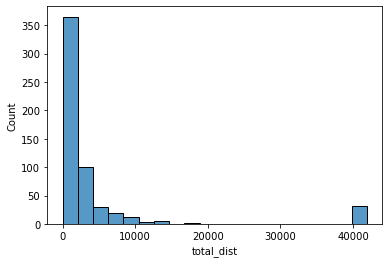

In [30]:
sns.histplot(data=float_distances, x='total_dist', bins=20)